# **Final Project Task 1 - Census Data Preprocess**

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data  **3p**
- Handle missing values if any **1p**
- Correct errors, inconsistencies, remove duplicates if any **1p**
- Outlier detection and treatment if any **1p**
- Normalization / Standardization if necesarry **1p**
- Feature engineering **3p**
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [420]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values="?", skipinitialspace=True)
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [421]:
X = data.drop(columns=["hours-per-week"])
y = data["hours-per-week"]

print("Dataset shape:", data.shape)
print("Feature shape:", X.shape, "Target shape:", y.shape)
print("Feature names:", list(X.columns))
print("Target name:", "hours-per-week")


Dataset shape: (32561, 15)
Feature shape: (32561, 14) Target shape: (32561,)
Feature names: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'native-country', 'income']
Target name: hours-per-week


In [ ]:
def detect_missing_values(dataframe):
    missing_counts = dataframe.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]
    missing_percent = (missing_counts / len(dataframe)) * 100
    return pd.DataFrame({"Missing Count": missing_counts, "Missing Percent": missing_percent})

print(detect_missing_values(data))


                Missing Count  Missing Percent
workclass                1836         5.638647
occupation               1843         5.660146
native-country            583         1.790486


In [ ]:
def drop_missing_values(data, columns):
    return data.dropna(subset=columns)

data = drop_missing_values(data, ["workclass", "occupation", "native-country"])

print(detect_missing_values(data))  

print(f"New dataset shape after dropping missing values: {data.shape}")


Empty DataFrame
Columns: [Missing Count, Missing Percent]
Index: []
New dataset shape after dropping missing values: (30162, 15)


In [ ]:
def detect_duplicates(data):
    print(f"Number of duplicate rows: {data.duplicated().sum()}")
    return data[data.duplicated()]

duplicates = detect_duplicates(data)

print(duplicates.head())


Number of duplicate rows: 23
       age workclass  fnlwgt     education  education-num marital-status  \
4881    25   Private  308144     Bachelors             13  Never-married   
5104    90   Private   52386  Some-college             10  Never-married   
9171    21   Private  250051  Some-college             10  Never-married   
11631   20   Private  107658  Some-college             10  Never-married   
13084   25   Private  195994       1st-4th              2  Never-married   

            occupation   relationship                race     sex  \
4881      Craft-repair  Not-in-family               White    Male   
5104     Other-service  Not-in-family  Asian-Pac-Islander    Male   
9171    Prof-specialty      Own-child               White  Female   
11631     Tech-support  Not-in-family               White  Female   
13084  Priv-house-serv  Not-in-family               White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
4881              0      

In [ ]:
data = data.drop_duplicates()

print(f"Remaining duplicate rows: {data.duplicated().sum()}")
print(f"Final dataset shape: {data.shape}")


Remaining duplicate rows: 0
Final dataset shape: (30139, 15)


In [426]:
def fix_inconsistencies(data):
    for col in data.select_dtypes(include='object'):
        data[col] = data[col].str.strip().str.lower()
    return data

data = fix_inconsistencies(data)


Pana acum, am implementat mai multe tehnici pentru a ma asigura ca dataset ul este curatat si pregatit pentru urmatoarele etape de preprocesare. Am inceput prin a identifica valorile lipsa.Pentru acest pas am folosit o functie care calculeaza numarul total si procentul pentru fiecare coloana. Acest lucru este esential pentru a intelege cat de afectate sunt anumite coloane si daca trebui sa elimin randurile sau sa inlocuim valorile lipsa. In cazul meu, am identificat valori lipsa in coloanele: workclass, occupation si native-country.  Deoarece aceste caracteristici sunt relevante pentru analiza noastrÄƒ È™i completarea valorilor lipsÄƒ ar fi dificilÄƒ fÄƒrÄƒ a introduce bias, am decis sÄƒ elimin rÃ¢ndurile care conÈ›in valori lipsÄƒ Ã®n aceste coloane. DupÄƒ aceastÄƒ operaÈ›iune, am verificat din nou prezenÈ›a valorilor lipsÄƒ pentru a ne asigura cÄƒ datasetul este complet.

In continuare, am verificat si eliminat randurile duplicate. Acest pas este crucial deoarece duplicatele pot afecta rezultatele modelului nostru, introducÃ¢nd bias È™i supra-reprezentÃ¢nd anumite observaÈ›ii.DupÄƒ identificarea È™i eliminarea rÃ¢ndurilor duplicate, am confirmat cÄƒ toate Ã®nregistrÄƒrile sunt unice, contribuind astfel la o distribuÈ›ie corectÄƒ a datelor.

Un alt aspect important a fost verificarea erorilor si a inconsecventelor din date. ÃŽn multe cazuri, datele textuale pot conÈ›ine variaÈ›ii neintenÈ›ionate, cum ar fi diferenÈ›e de capitalizare (Private vs. private) sau spaÈ›ii suplimentare (* Self-emp-not-inc* vs. Self-emp-not-inc). Pentru a corecta aceste probleme, am aplicat o funcÈ›ie care eliminÄƒ spaÈ›iile inutile È™i transformÄƒ toate valorile categoriale Ã®n litere mici. Acest lucru ne asigurÄƒ cÄƒ atunci cÃ¢nd aplicÄƒm metode de codificare, fiecare categorie este reprezentatÄƒ corect È™i nu existÄƒ duplicate artificiale cauzate de diferenÈ›e minore de formatare.

In [ ]:
# Aici, am eliminat niste coloane pe care le consider mai problematice si nu neaparat necesare modelului.
# De ex, capital-gain si loss aveau foarte multi outliers.


data = data.drop(columns=["fnlwgt", "native-country", "capital-gain", "capital-loss", "occupation"], errors="ignore")

In [428]:
data.head()

age         workclass  education  education-num      marital-status  \
0   39         state-gov  bachelors             13       never-married   
1   50  self-emp-not-inc  bachelors             13  married-civ-spouse   
2   38           private    hs-grad              9            divorced   
3   53           private       11th              7  married-civ-spouse   
4   28           private  bachelors             13  married-civ-spouse   

    relationship   race     sex  hours-per-week income  
0  not-in-family  white    male              40  <=50k  
1        husband  white    male              13  <=50k  
2  not-in-family  white    male              40  <=50k  
3        husband  black    male              40  <=50k  
4           wife  black  female              40  <=50k

DupÄƒ preprocesarea iniÈ›ialÄƒ a datelor, urmÄƒtorul pas este separarea acestora Ã®n variabile independente (features) È™i variabila dependentÄƒ (target). ÃŽn acest caz, variabila È›intÄƒ este hours-per-week, iar restul coloanelor sunt considerate caracteristici pentru modelul de regresie.

ÃŽmpÄƒrÈ›irea Ã®n set de antrenament È™i test se realizeaza astfel: X_train si Y_train vor fi utilizate pentru antrenarea modelului (80%), X_test si Y_test pentru testare si evaluare (20%). Am ales sÄƒ Ã®mpart datele Ã®n 80% pentru antrenare È™i 20% pentru testare deoarece dataset-ul este suficient de mare. AceastÄƒ proporÈ›ie oferÄƒ destule date pentru ca modelul sÄƒ Ã®nveÈ›e bine, dar È™i un set de test suficient de mare pentru a verifica dacÄƒ modelul funcÈ›ioneazÄƒ corect pe date noi.

In continuare, pentru ca modelul sa aiba o performanta buna, am identificat si ulterior tratat outliers. Acestia pot avea un impact negativ asupra modelului de regresie. Pentru a identifica outliers, am creat un boxplot pentru fiecare coloana numerica. 

In [ ]:
target_col = "hours-per-week"

X = data.drop(columns=[target_col])
y = data[target_col] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

ðŸ“Œ X_train shape: (24111, 9), X_test shape: (6028, 9)
ðŸ“Œ y_train shape: (24111,), y_test shape: (6028,)


ðŸ“Œ Outliers BEFORE IQR capping:


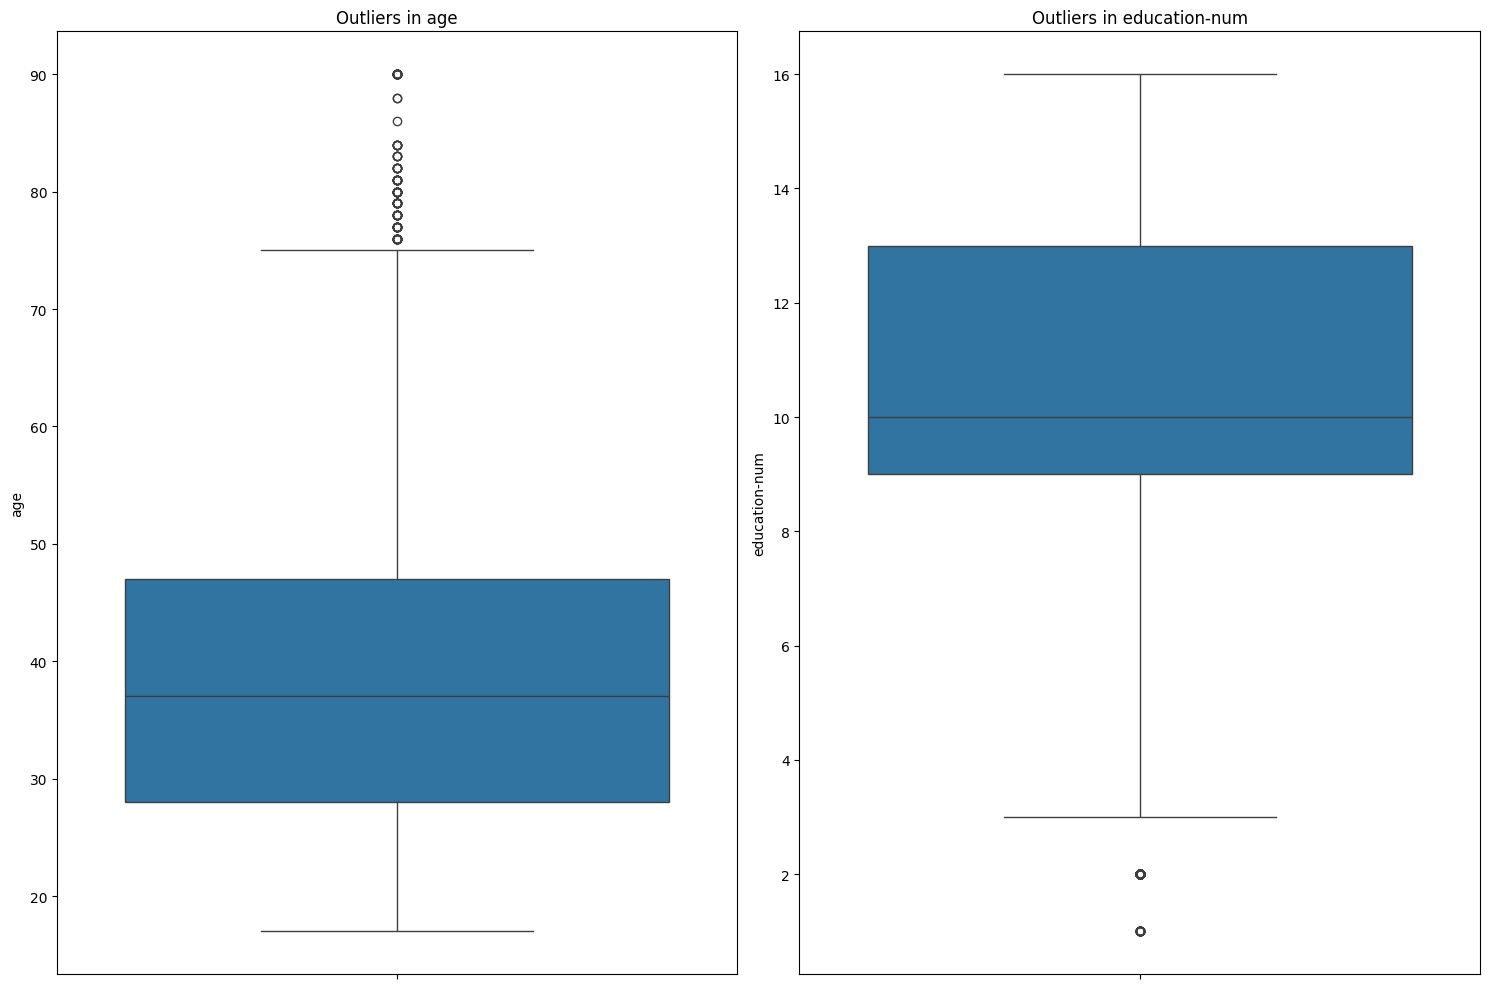

In [ ]:
def plot_outliers(data, numeric_cols):
    """
    Plots boxplots for all numerical columns to visualize outliers.

    Parameters:
    - data: DataFrame containing numeric columns
    - numeric_cols: List of numeric column names
    """
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot((len(numeric_cols) + 1) // 2, 2, i)
        sns.boxplot(y=data[col])
        plt.title(f"Outliers in {col}")
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()

numeric_cols = X_train.select_dtypes(include=[np.number]).columns

print("Outliers BEFORE IQR capping:")
plot_outliers(X_train, numeric_cols)


Dupa o analiza a boxplot urilor, am ales sa tratez initial outliers prin metoda IQR - Interquartile Range. 

Am ales aceasta metoda deoarece elimina efectele valorilor extreme fara a le sterge complet. Spre deosebire de metode precum eliminarea completa a valorilor extreme, iqr ajusteaza valorile extreme prin limitarea lor la un interval rezonabil. In plus, IQR utilizeaza quartilele 1 si 3, ceea ce o face mai potrivita pentru seturi de date cu distributii neregulate. 

PÄƒstreazÄƒ datele intacte, Ã®n loc sÄƒ le È™teargÄƒ. Nu este afectatÄƒ de distribuÈ›ia datelor, spre deosebire de metode bazate pe media È™i deviaÈ›ia standard. EficientÄƒ pentru date reale, unde extremele pot fi cauzate de erori sau situaÈ›ii excepÈ›ionale. PregÄƒteÈ™te mai bine modelul pentru predicÈ›ii, eliminÃ¢nd zgomotul creat de valori anormale.

ðŸ“Œ Outliers AFTER IQR capping:


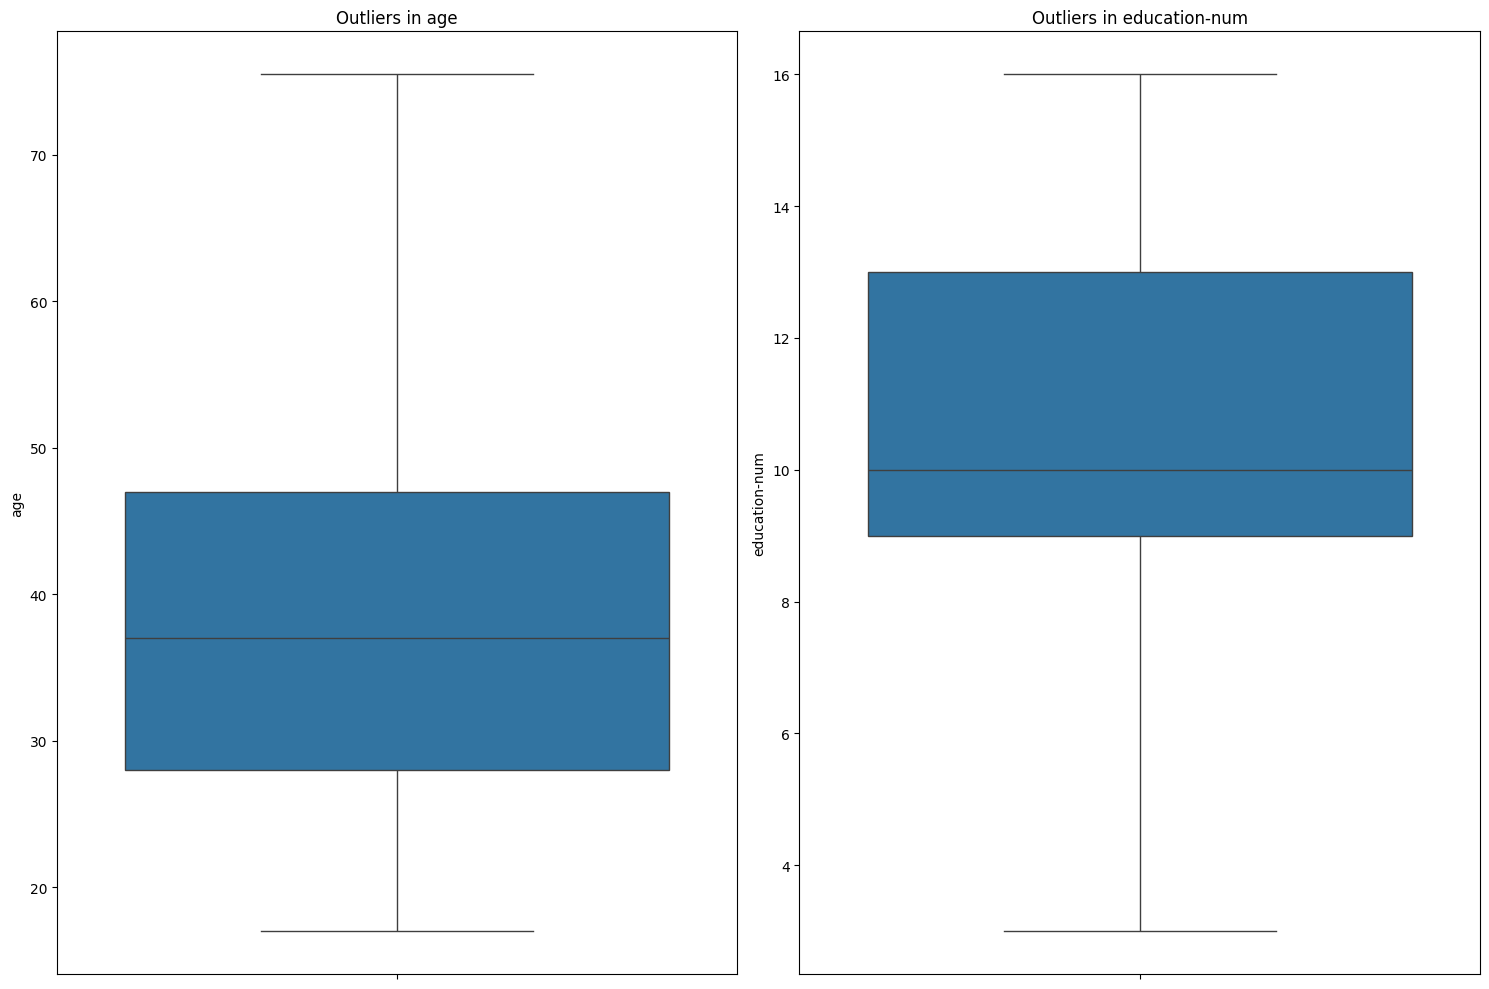

In [ ]:
def cap_outliers_with_train(train, test, numeric_cols):
    """
    Applies IQR capping to numerical columns in training and testing sets.

    Parameters:
    - train: DataFrame containing training features
    - test: DataFrame containing testing features
    - numeric_cols: List of numerical feature column names (excluding target)
    
    Returns:
    - Updated train and test DataFrames with capped outliers
    """
    for column in numeric_cols:
        Q1 = train[column].quantile(0.25)
        Q3 = train[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        train[column] = train[column].clip(lower=lower_bound, upper=upper_bound)
        test[column] = test[column].clip(lower=lower_bound, upper=upper_bound)

    return train, test

numeric_cols = [col for col in X_train.select_dtypes(include=[np.number]).columns if col != "hours-per-week"]

X_train, X_test = cap_outliers_with_train(X_train, X_test, numeric_cols)

print("Outliers AFTER IQR capping:")
plot_outliers(X_train, numeric_cols)

DupÄƒ ce am tratat outlierii folosind metoda IQR, urmÄƒtorul pas esenÈ›ial este standardizarea caracteristicilor numerice. Standardizarea este crucialÄƒ pentru multe modele de Machine Learning, deoarece ajutÄƒ algoritmii sÄƒ funcÈ›ioneze mai eficient È™i sÄƒ Ã®nveÈ›e mai rapid.

Unele variabile, cum ar fi vÃ¢rsta (age), pot avea valori Ã®ntre 18 È™i 90, Ã®n timp ce numÄƒrul de ore lucrate pe sÄƒptÄƒmÃ¢nÄƒ poate fi Ã®ntre 10 È™i 80.
Modelele care utilizeazÄƒ distante pot fi influenÈ›ate de caracteristici cu valori mari È™i pot acorda mai multÄƒ importanÈ›Äƒ acestora.

Se transformÄƒ fiecare caracteristicÄƒ numericÄƒ astfel Ã®ncÃ¢t sÄƒ aibÄƒ media 0 È™i deviaÈ›ia standard 1. IdentificÄƒ caracteristicile numerice care trebuie standardizate. target_col este exclus, deoarece nu vrem sÄƒ standardizÄƒm variabila È›intÄƒ (hours-per-week). Se creeazÄƒ o listÄƒ cu toate coloanele numerice, excluzÃ¢nd variabila È›intÄƒ.

Excludem variabila È›intÄƒ ("hours-per-week") â€“ Modelul trebuie sÄƒ prezicÄƒ aceastÄƒ valoare, deci nu vrem sÄƒ o schimbÄƒm. AplicÄƒm standardizarea doar pe setul de antrenament È™i folosim aceiaÈ™i parametri pe setul de test â€“ Astfel evitÄƒm "data leakage" È™i asigurÄƒm cÄƒ modelul va funcÈ›iona corect pe noi exemple. Folosim StandardScaler din scikit-learn, care este optimizat È™i uÈ™or de folosit Ã®n orice model de Machine Learning.

In [ ]:
def standardize_features(train, test, numeric_cols, target_col):
    """
    Standardizes numerical columns using StandardScaler (excluding target variable).
    
    Parameters:
    - train: Training DataFrame (X_train)
    - test: Testing DataFrame (X_test)
    - numeric_cols: List of numerical feature column names (excluding target)
    - target_col: The target variable that should NOT be standardized
    
    Returns:
    - Updated train and test DataFrames with standardized numerical features
    """
    features_to_standardize = [col for col in numeric_cols if col != target_col]

    scaler = StandardScaler()

    train[features_to_standardize] = scaler.fit_transform(train[features_to_standardize])
    test[features_to_standardize] = scaler.transform(test[features_to_standardize])

    return train, test

numeric_cols = [col for col in X_train.select_dtypes(include=[np.number]).columns if col != "hours-per-week"]

X_train, X_test = standardize_features(X_train, X_test, numeric_cols, target_col="hours-per-week")

print("Train Data AFTER Standardization:")
print(X_train.head())

print("\n Test Data AFTER Standardization:")
print(X_test.head())


ðŸ“Œ Train Data AFTER Standardization:
            age    workclass     education  education-num marital-status  \
2489   1.189187      private  some-college      -0.049998       divorced   
4887  -0.419088  federal-gov    assoc-acdm       0.739970  never-married   
5969  -0.495673      private       hs-grad      -0.444981  never-married   
29494  0.040419    state-gov     assoc-voc       0.344986  never-married   
30392 -1.491272    state-gov  some-college      -0.049998  never-married   

         relationship   race     sex income  
2489        unmarried  white  female  <=50k  
4887        unmarried  black  female  <=50k  
5969   other-relative  black    male  <=50k  
29494       unmarried  white  female  <=50k  
30392       own-child  white    male  <=50k  

ðŸ“Œ Test Data AFTER Standardization:
            age workclass  education  education-num      marital-status  \
9395  -0.572257   private    hs-grad      -0.444981       never-married   
3393  -0.419088   private  assoc-voc   

In etapa urmatoare, dupa ce m-am asigurat ca datele arata ok, nu exista outliers si am standardizat, m-am ocupat de transformarea variabilelor categorice. Aici, am aplicat atat encodare manuala, cat si One-Hot encoding. 

Initial, am encodat coloanele sex in 1- female si 0-male, iar dupa income <=50K -0 si >50K - 1. 

DupÄƒ ce am transformat variabilele binare, trebuie sÄƒ transformÄƒm variabilele categoriale care au mai mult de douÄƒ clase (ex. 'workclass', 'education', 'marital-status' etc.)

Deoarece modelele de Machine Learning nu pot lucra cu texte, folosim One-Hot Encoding, care: creeazÄƒ o coloanÄƒ nouÄƒ pentru fiecare categorie; seteazÄƒ 1 dacÄƒ rÃ¢ndul respectiv aparÈ›ine categoriei, altfel 0; EvitÄƒ problema multicoliniaritÄƒÈ›ii eliminÃ¢nd prima categorie (folosim drop='first').

Encodare manualÄƒ pentru variabilele binare â€“ este simplÄƒ, rapidÄƒ È™i reduce numÄƒrul de dimensiuni din date. One-Hot Encoding pentru variabilele multi-clasÄƒ â€“ este standardul pentru variabile categoriale È™i ajutÄƒ modelele sÄƒ Ã®nÈ›eleagÄƒ relaÈ›iile dintre categorii fÄƒrÄƒ sÄƒ introducÄƒ bias. MenÈ›inerea tipurilor de date ca Ã®ntregi (int) â€“ evitÄƒ probleme Ã®n interpretarea modelelor È™i pÄƒstreazÄƒ un format clar al datelor.

In [433]:
def manual_encoding(X_train, X_test):
    """
    Manually encodes 'sex' (0 = male, 1 = female) and 'income' (0 = <=50k, 1 = >50k) in features.
    
    Parameters:
    - X_train: Training feature DataFrame
    - X_test: Testing feature DataFrame

    Returns:
    - Encoded X_train, X_test with integers instead of strings
    """
    X_train['sex'] = X_train['sex'].map({'male': 0, 'female': 1}).astype(int)
    X_test['sex'] = X_test['sex'].map({'male': 0, 'female': 1}).astype(int)

    X_train['income'] = X_train['income'].map({'<=50k': 0, '>50k': 1}).astype(int)
    X_test['income'] = X_test['income'].map({'<=50k': 0, '>50k': 1}).astype(int)

    return X_train, X_test

X_train, X_test = manual_encoding(X_train, X_test)

print("Encoded 'sex' and 'income' columns (Check for integers):")
print(X_train[['sex', 'income']].dtypes)  
print(X_train[['sex', 'income']].head()) 

Encoded 'sex' and 'income' columns (Check for integers):
sex       int64
income    int64
dtype: object
       sex  income
2489     1       0
4887     1       0
5969     0       0
29494    1       0
30392    0       0


In [434]:
X_train.head()

age    workclass     education  education-num marital-status  \
2489   1.189187      private  some-college      -0.049998       divorced   
4887  -0.419088  federal-gov    assoc-acdm       0.739970  never-married   
5969  -0.495673      private       hs-grad      -0.444981  never-married   
29494  0.040419    state-gov     assoc-voc       0.344986  never-married   
30392 -1.491272    state-gov  some-college      -0.049998  never-married   

         relationship   race  sex  income  
2489        unmarried  white    1       0  
4887        unmarried  black    1       0  
5969   other-relative  black    0       0  
29494       unmarried  white    1       0  
30392       own-child  white    0       0

In [435]:
def one_hot_encode_remaining(X_train, X_test):
    """
    Encodes remaining categorical variables using One-Hot Encoding and ensures outputs are integers.

    Parameters:
    - X_train: Training DataFrame (features only, no target variable)
    - X_test: Testing DataFrame (features only, no target variable)

    Returns:
    - Encoded train and test DataFrames with integer values instead of floats
    """

    cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
    cat_cols = [col for col in cat_cols if col not in ['sex', 'income']]

    if not cat_cols:
        print("No categorical columns left for encoding.")
        return X_train, X_test


    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

    train_encoded = pd.DataFrame(encoder.fit_transform(X_train[cat_cols]), columns=encoder.get_feature_names_out(cat_cols))
    test_encoded = pd.DataFrame(encoder.transform(X_test[cat_cols]), columns=encoder.get_feature_names_out(cat_cols))

    train_encoded = train_encoded.astype(int)
    test_encoded = test_encoded.astype(int)

    X_train = X_train.drop(columns=cat_cols).reset_index(drop=True)
    X_test = X_test.drop(columns=cat_cols).reset_index(drop=True)

    X_train = pd.concat([X_train, train_encoded], axis=1)
    X_test = pd.concat([X_test, test_encoded], axis=1)

    return X_train, X_test

X_train, X_test = one_hot_encode_remaining(X_train, X_test)




In [ ]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

All datasets have been successfully saved as CSV files.


Ultimul pas a fost salvarea datelor in csv pentru a putea lucra ulterior cu datele preprocesate. Dupa ce am efectuat pasii de mai sus, consider ca datele sunt "pregatite" pentru modele.